In [1]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, max_error, r2_score

In [2]:
import pandas as pd
import numpy as np
import math
import seaborn as sns

## Valle calculate elevation for ASV

In [3]:
#FILE NAME RENAMED WRONG, IT IS ACTUALLY ASV!!!!
valle_asv = pd.read_csv('../data/output/Valle_ALS_validaatiopisteet_vertailuun_siivottu_2.csv', delimiter=';')

In [4]:
valle_asv

,PointNo,Elevation_orthometricH,Latitude,Longitude,Height_ellipsoidalH,ASV_depth,Geoid_h,Water_lvl,ASV_ElevationH,Validation_depth,ASV_Height_ellipsoidalH
0,valle14,64.832,69.925991,27.001370,89.137092,-1.168000,24.52,64.41,63.242000,-1.590000,87.762000
1,valle12,64.710,69.926008,27.001523,89.015000,-1.238200,24.52,64.41,63.171800,-1.538200,87.691800
2,valle26,64.875,69.925940,27.001467,89.180286,-0.908000,24.52,64.41,63.502000,-1.373000,88.022000
3,valle17,65.037,69.926075,27.001217,89.342939,-0.082000,24.52,64.41,64.328000,-0.709000,88.848000
4,valle15,64.981,69.925987,27.001334,89.286498,-1.155102,24.52,64.41,63.254898,-1.726102,87.774898


In [5]:
valle_asv['PointLocation_Elevation'] = 66.016000

In [6]:
valle_asv

,PointNo,Elevation_orthometricH,Latitude,Longitude,Height_ellipsoidalH,ASV_depth,Geoid_h,Water_lvl,ASV_ElevationH,Validation_depth,ASV_Height_ellipsoidalH,PointLocation_Elevation
0,valle14,64.832,69.925991,27.001370,89.137092,-1.168000,24.52,64.41,63.242000,-1.590000,87.762000,66.016
1,valle12,64.710,69.926008,27.001523,89.015000,-1.238200,24.52,64.41,63.171800,-1.538200,87.691800,66.016
2,valle26,64.875,69.925940,27.001467,89.180286,-0.908000,24.52,64.41,63.502000,-1.373000,88.022000,66.016
3,valle17,65.037,69.926075,27.001217,89.342939,-0.082000,24.52,64.41,64.328000,-0.709000,88.848000,66.016
4,valle15,64.981,69.925987,27.001334,89.286498,-1.155102,24.52,64.41,63.254898,-1.726102,87.774898,66.016


In [7]:
valle_asv = valle_asv.drop(columns=['Geoid_h', 'Water_lvl', 'ASV_ElevationH', 'ASV_Height_ellipsoidalH', 'Validation_depth'])

In [8]:
valle_asv

,PointNo,Elevation_orthometricH,Latitude,Longitude,Height_ellipsoidalH,ASV_depth,PointLocation_Elevation
0,valle14,64.832,69.925991,27.001370,89.137092,-1.168000,66.016
1,valle12,64.710,69.926008,27.001523,89.015000,-1.238200,66.016
2,valle26,64.875,69.925940,27.001467,89.180286,-0.908000,66.016
3,valle17,65.037,69.926075,27.001217,89.342939,-0.082000,66.016
4,valle15,64.981,69.925987,27.001334,89.286498,-1.155102,66.016


In [9]:
valle_asv['ASV_Elevation'] = valle_asv['PointLocation_Elevation'] + valle_asv['ASV_depth']

In [10]:
valle_asv

,PointNo,Elevation_orthometricH,Latitude,Longitude,Height_ellipsoidalH,ASV_depth,PointLocation_Elevation,ASV_Elevation
0,valle14,64.832,69.925991,27.001370,89.137092,-1.168000,66.016,64.848000
1,valle12,64.710,69.926008,27.001523,89.015000,-1.238200,66.016,64.777800
2,valle26,64.875,69.925940,27.001467,89.180286,-0.908000,66.016,65.108000
3,valle17,65.037,69.926075,27.001217,89.342939,-0.082000,66.016,65.934000
4,valle15,64.981,69.925987,27.001334,89.286498,-1.155102,66.016,64.860898


In [11]:
valle_asv = valle_asv.rename(columns={"Elevation_orthometricH": "Validation_Elevation", "Height_ellipsoidalH": "Height"})

In [12]:
valle_asv

,PointNo,Validation_Elevation,Latitude,Longitude,Height,ASV_depth,PointLocation_Elevation,ASV_Elevation
0,valle14,64.832,69.925991,27.001370,89.137092,-1.168000,66.016,64.848000
1,valle12,64.710,69.926008,27.001523,89.015000,-1.238200,66.016,64.777800
2,valle26,64.875,69.925940,27.001467,89.180286,-0.908000,66.016,65.108000
3,valle17,65.037,69.926075,27.001217,89.342939,-0.082000,66.016,65.934000
4,valle15,64.981,69.925987,27.001334,89.286498,-1.155102,66.016,64.860898


## Compute RMSE, MAE and MAXE, R2

In [13]:
asv_actual = valle_asv['Validation_Elevation'].values.tolist()
asv_actual

[64.832, 64.71, 64.875, 65.037, 64.981]

In [14]:
valle_asv['ASV_Elevation_round'] = round(valle_asv['ASV_Elevation'], 3)

In [15]:
valle_asv

,PointNo,Validation_Elevation,Latitude,Longitude,Height,ASV_depth,PointLocation_Elevation,ASV_Elevation,ASV_Elevation_round
0,valle14,64.832,69.925991,27.001370,89.137092,-1.168000,66.016,64.848000,64.848
1,valle12,64.710,69.926008,27.001523,89.015000,-1.238200,66.016,64.777800,64.778
2,valle26,64.875,69.925940,27.001467,89.180286,-0.908000,66.016,65.108000,65.108
3,valle17,65.037,69.926075,27.001217,89.342939,-0.082000,66.016,65.934000,65.934
4,valle15,64.981,69.925987,27.001334,89.286498,-1.155102,66.016,64.860898,64.861


In [16]:
asv_predicted = valle_asv['ASV_Elevation_round'].values.tolist()
asv_predicted

[64.848, 64.778, 65.108, 65.934, 64.861]

In [17]:
MSE = mean_squared_error(asv_actual, asv_predicted)
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

0.4190890120248885


In [18]:
MAE = mean_absolute_error(asv_actual, asv_predicted)

print("Mean Absolute Error:\n")
print(MAE)

Mean Absolute Error:

0.26680000000000065


In [19]:
# Compute max_error
MAXE = max_error(asv_actual, asv_predicted)

print("Maximum residual Error:\n")
print(MAXE)

Maximum residual Error:

0.8969999999999914


In [20]:
# Compute r2
R2 = r2_score(asv_actual, asv_predicted)

print("Coefficient of determination regression score:\n")
print(R2)

Coefficient of determination regression score:

-12.339277576934958


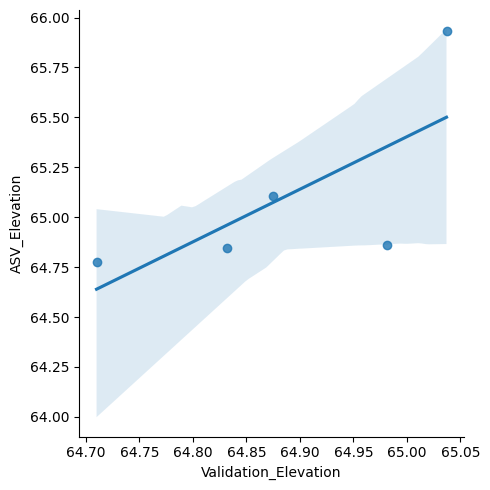

In [21]:
sns.lmplot(x="Validation_Elevation", y="ASV_Elevation", data=valle_asv)

## Valle Elevations from ALS

In [22]:
valle_als = pd.read_csv('../data/output/valle_als_vertailutaulukko.csv', delimiter=',')

In [23]:
valle_als

,PointNo,Northing,Easting,Elevation,Latitude,Longitude,Height,Horizontal,VerticalSt,PDOP,...,StartGPSwe,StartGPSse,EndGPSweek,EndGPSseco,SAMPLE_1,SAMPLE_2,SAMPLE_3,SAMPLE_4,SAMPLE_5,SAMPLE_6
0,valle1,7757608.695,500041.929,66.016,69.925891,27.001095,90.322226,0.005,0.011,1.2,...,2267,27216,2267,27218,-198.904,90.967,89.386889,89.922427,262,17.847200
1,valle2,7757602.595,500041.839,66.272,69.925836,27.001092,90.577668,0.005,0.011,1.6,...,2267,27236,2267,27238,90.041,188.512,91.148937,91.074363,268,5.966123
2,valle3,7757600.166,500048.506,65.981,69.925814,27.001266,90.286394,0.005,0.011,1.6,...,2267,27268,2267,27270,75.875,90.973,90.342744,90.332491,254,1.123069
3,valle4,7757596.831,500055.210,65.670,69.925784,27.001441,89.975550,0.005,0.011,1.6,...,2267,27297,2267,27299,89.588,202.993,90.626247,90.559079,235,7.351677
4,valle5,7757597.569,500059.478,65.275,69.925791,27.001553,89.580965,0.005,0.011,1.6,...,2267,27322,2267,27325,-221.902,90.311,88.452608,87.827659,245,19.870363
5,valle6,7757599.554,500062.164,65.144,69.925809,27.001623,89.449445,0.005,0.010,1.5,...,2267,27415,2267,27418,-246.538,90.125,87.235255,87.905665,267,26.101060
6,valle7,7757602.512,500058.781,65.307,69.925835,27.001534,89.612676,0.006,0.012,1.5,...,2267,27443,2267,27446,89.201,90.165,89.635106,89.634905,246,0.269854
7,valle8,7757603.885,500062.909,64.937,69.925848,27.001642,89.241923,0.005,0.011,1.5,...,2267,27494,2267,27497,-247.259,92.873,87.095317,87.853051,271,25.271296
8,valle9,7757607.669,500064.868,64.808,69.925882,27.001693,89.112957,0.005,0.010,1.5,...,2267,27531,2267,27533,88.570,90.438,89.085112,89.101316,276,0.306402
9,valle10,7757612.643,500063.606,64.737,69.925926,27.001660,89.041733,0.005,0.010,1.5,...,2267,27566,2267,27568,88.488,89.815,88.991417,89.003451,266,0.288036


In [24]:
valle_als = valle_als.drop(columns=['Horizontal', 'VerticalSt', 'PDOP', 'StartGPSwe', 'StartGPSse', 'EndGPSweek', 'EndGPSseco'])

In [25]:
valle_als = valle_als.rename(columns={"SAMPLE_4": "IDW", "SAMPLE_6": "Stdev"})

In [26]:
valle_als_actual = valle_als['Height'].values.tolist()

In [27]:
valle_als_predicted = valle_als['IDW'].values.tolist()

In [28]:
#testi = valle_als

In [29]:
#testi['erotus'] = testi['IDW']-24.52

In [30]:
#testi['erotus2'] = testi['Height']-testi['Elevation']

In [31]:
#testi['erotus3'] = testi['IDW'] - testi['erotus2']

In [32]:
#testi

In [33]:
#testi_als_actual = testi['Elevation'].values.tolist()
#testi_als_predicted = valle_als['erotus3'].values.tolist()

In [34]:
#MSE = mean_squared_error(testi_als_actual, testi_als_predicted)
 
#RMSE = math.sqrt(MSE)
#print("Root Mean Square Error:\n")
#print(RMSE)

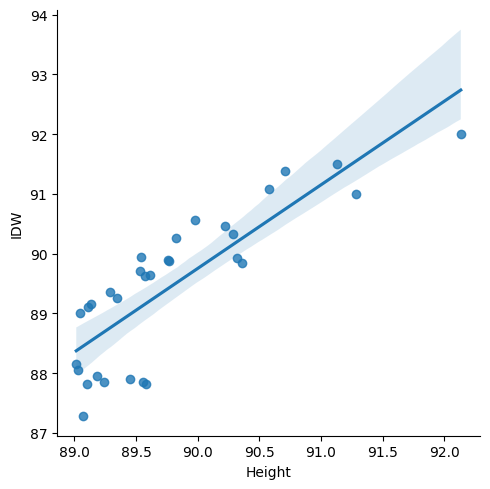

In [35]:
sns.lmplot(x="Height", y="IDW", data=valle_als)

# Compute RMSE, MAE, MAXE, R2

In [37]:
MSE = mean_squared_error(valle_als_actual, valle_als_predicted)
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

0.8131865198308067


In [38]:
MAE = mean_absolute_error(valle_als_actual, valle_als_predicted)

print("Mean Absolute Error:\n")
print(MAE)

Mean Absolute Error:

0.5743318585227102


In [39]:
# Compute max_error
MAXE = max_error(valle_als_actual, valle_als_predicted)

print("Maximum residual Error:\n")
print(MAXE)

Maximum residual Error:

1.793143002957109


In [40]:
# Compute r2
R2 = r2_score(valle_als_actual, valle_als_predicted)

print("Coefficient of determination regression score:\n")
print(R2)

Coefficient of determination regression score:

-0.1913705478507879


## Nuorgam calculate Elevations from ALS

In [41]:
nuorgam_als = pd.read_csv('../data/output/nuorgam_ALS_vertailutaulukko_2.csv', delimiter=',')

In [42]:
nuorgam_als

,PointNo,Northing,Easting,Elevation,Latitude,Longitude,Height,Horizontal,VerticalSt,PDOP,...,StartGPSwe,StartGPSse,EndGPSweek,EndGPSseco,SAMPLE_1,SAMPLE_2,SAMPLE_3,SAMPLE_4,SAMPLE_5,SAMPLE_6
0,nuorgamchool21,7775281.244,532924.162,13.901,70.082266,27.865977,36.712001,0.006,0.012,1.2,...,2266,573679,2266,573682,13.96,14.50,14.104783,14.091717,23,0.138120
1,nuorgamchool20,7775286.658,532928.271,13.251,70.082314,27.866088,36.062210,0.006,0.012,1.3,...,2266,573660,2266,573662,13.26,13.47,13.332273,13.329917,22,0.051780
2,nuorgamchool23,7775299.913,532924.426,12.666,70.082434,27.865991,35.476537,0.006,0.013,1.2,...,2266,573748,2266,573751,12.50,12.62,12.557500,12.551521,20,0.034040
3,nuorgamchool22,7775289.511,532919.718,12.776,70.082341,27.865864,35.587464,0.006,0.012,1.2,...,2266,573707,2266,573709,12.54,12.82,12.696818,12.702224,22,0.073199
4,nuorgamchool17,7775301.575,532933.338,12.357,70.082448,27.866226,35.167106,0.006,0.012,1.2,...,2266,573580,2266,573583,11.84,12.40,12.116111,12.126546,18,0.163814
5,nuorgamchool16,7775301.048,532932.769,12.697,70.082443,27.866211,35.507415,0.006,0.012,1.2,...,2266,573552,2266,573554,12.15,12.73,12.482000,12.520504,20,0.166751
6,nuorgamchool19,7775291.658,532925.799,12.924,70.082360,27.866024,35.734533,0.006,0.012,1.2,...,2266,573642,2266,573644,12.83,12.98,12.906500,12.905171,20,0.041985
7,nuorgamchool18,7775298.075,532927.587,12.819,70.082417,27.866074,35.629620,0.006,0.012,1.2,...,2266,573615,2266,573617,12.70,12.87,12.790526,12.784147,19,0.041735
8,nuorgamchool29,7775303.736,532912.684,12.427,70.082470,27.865684,35.238141,0.006,0.013,1.2,...,2266,573979,2266,573982,12.17,12.38,12.276000,12.272080,20,0.057741
9,nuorgamchool28,7775301.989,532918.210,12.658,70.082453,27.865829,35.468974,0.006,0.013,1.2,...,2266,573949,2266,573951,12.46,12.61,12.540000,12.537677,20,0.035637


In [43]:
nuorgam_als = nuorgam_als.drop(columns=['Horizontal', 'VerticalSt', 'PDOP', 'StartGPSwe', 'StartGPSse', 'EndGPSweek', 'EndGPSseco'])

In [44]:
nuorgam_als = nuorgam_als.rename(columns={"SAMPLE_4": "IDW", "SAMPLE_6": "Stdev"})

In [45]:
nuorgam_als

,PointNo,Northing,Easting,Elevation,Latitude,Longitude,Height,HDOP,VDOP,NumberOfPo,NumberOfSa,Day,TSC3Time,TSC3UTC,SAMPLE_1,SAMPLE_2,SAMPLE_3,IDW,SAMPLE_5,Stdev
0,nuorgamchool21,7775281.244,532924.162,13.901,70.082266,27.865977,36.712001,0.5,1.1,4,25,17.6.2023,18:21:03.000,15:21:03,13.96,14.50,14.104783,14.091717,23,0.138120
1,nuorgamchool20,7775286.658,532928.271,13.251,70.082314,27.866088,36.062210,0.6,1.1,3,24,17.6.2023,18:20:43.000,15:20:43,13.26,13.47,13.332273,13.329917,22,0.051780
2,nuorgamchool23,7775299.913,532924.426,12.666,70.082434,27.865991,35.476537,0.5,1.1,4,25,17.6.2023,18:22:11.000,15:22:11,12.50,12.62,12.557500,12.551521,20,0.034040
3,nuorgamchool22,7775289.511,532919.718,12.776,70.082341,27.865864,35.587464,0.5,1.1,3,25,17.6.2023,18:21:30.000,15:21:30,12.54,12.82,12.696818,12.702224,22,0.073199
4,nuorgamchool17,7775301.575,532933.338,12.357,70.082448,27.866226,35.167106,0.5,1.1,4,25,17.6.2023,18:19:24.000,15:19:24,11.84,12.40,12.116111,12.126546,18,0.163814
5,nuorgamchool16,7775301.048,532932.769,12.697,70.082443,27.866211,35.507415,0.5,1.1,3,25,17.6.2023,18:18:55.000,15:18:55,12.15,12.73,12.482000,12.520504,20,0.166751
6,nuorgamchool19,7775291.658,532925.799,12.924,70.082360,27.866024,35.734533,0.5,1.1,3,25,17.6.2023,18:20:25.000,15:20:25,12.83,12.98,12.906500,12.905171,20,0.041985
7,nuorgamchool18,7775298.075,532927.587,12.819,70.082417,27.866074,35.629620,0.5,1.1,3,25,17.6.2023,18:19:58.000,15:19:58,12.70,12.87,12.790526,12.784147,19,0.041735
8,nuorgamchool29,7775303.736,532912.684,12.427,70.082470,27.865684,35.238141,0.5,1.1,4,27,17.6.2023,18:26:02.000,15:26:02,12.17,12.38,12.276000,12.272080,20,0.057741
9,nuorgamchool28,7775301.989,532918.210,12.658,70.082453,27.865829,35.468974,0.5,1.1,3,27,17.6.2023,18:25:32.000,15:25:32,12.46,12.61,12.540000,12.537677,20,0.035637


## Compute RMSE, MAE, MAXE, R2

In [46]:
als_actual = nuorgam_als['Elevation'].values.tolist()

In [47]:
als_predicted = nuorgam_als['IDW'].values.tolist()

In [48]:
MSE = mean_squared_error(als_actual, als_predicted)
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

0.15590362770959978


In [49]:
MAE = mean_absolute_error(als_actual, als_predicted)

print("Mean Absolute Error:\n")
print(MAE)

Mean Absolute Error:

0.12122943913710642


In [50]:
# Compute max_error
MAXE = max_error(als_actual, als_predicted)

print("Maximum residual Error:\n")
print(MAXE)

Maximum residual Error:

0.42413764507590024


In [51]:
# Compute r2
R2 = r2_score(als_actual, als_predicted)

print("Coefficient of determination regression score:\n")
print(R2)

Coefficient of determination regression score:

0.9095920797335996


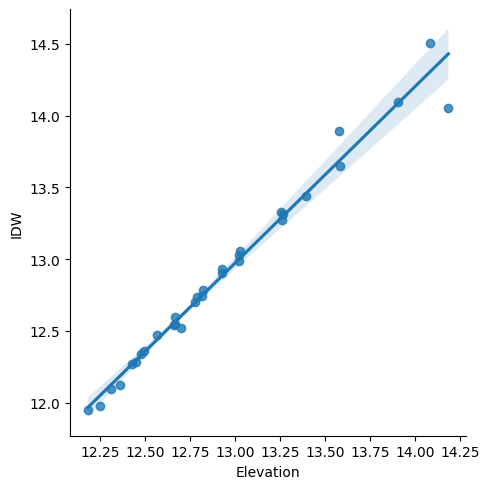

In [52]:
sns.lmplot(x="Elevation", y="IDW", data=nuorgam_als)

## Nuorgam ASV?

# Correlation testing

In [40]:
valle_corr_asv = pd.read_csv('../data/output/valle_asv_random_points.csv', delimiter=',')

In [41]:
valle_corr_asv

,id,SAMPLE_1
0,0,-2.912
1,1,-3.006
2,2,-3.052
3,3,-2.984
4,4,-3.020
...,...,...
280,280,-3.116
281,281,-1.306
282,282,-3.496
283,283,-3.257


In [42]:
valle_corr_als = pd.read_csv('../data/output/valle_als_random_points.csv', delimiter=',')

In [43]:
valle_corr_als

,id,SAMPLE_1,SAMPLE_2,SAMPLE_3,SAMPLE_4,SAMPLE_5,SAMPLE_6
0,0,86.64,90.48,87.643778,87.799765,45,0.933960
1,1,86.81,89.87,87.712187,87.673477,32,1.110483
2,2,90.46,90.48,90.466667,90.465773,3,0.009428
3,3,87.13,90.33,88.054286,88.042293,7,1.433007
4,4,87.68,90.29,88.205833,88.153330,12,0.920756
...,...,...,...,...,...,...,...
280,280,84.37,86.86,86.400000,86.496730,6,0.909139
281,281,88.46,90.43,88.944800,88.921395,75,0.329628
282,282,86.85,90.47,89.293000,89.265995,10,1.246171
283,283,86.83,89.89,88.233333,88.280590,21,1.334293


In [44]:
valle_corr_asv["ALS_IDW"] = valle_corr_als["SAMPLE_4"]

In [45]:
valle_corr_asv

,id,SAMPLE_1,ALS_IDW
0,0,-2.912,87.799765
1,1,-3.006,87.673477
2,2,-3.052,90.465773
3,3,-2.984,88.042293
4,4,-3.020,88.153330
...,...,...,...
280,280,-3.116,86.496730
281,281,-1.306,88.921395
282,282,-3.496,89.265995
283,283,-3.257,88.280590


In [46]:
valle_corr_asv = valle_corr_asv.rename(columns={"SAMPLE_1": "ASV_IDW"})

In [47]:
valle_corr_asv

,id,ASV_IDW,ALS_IDW
0,0,-2.912,87.799765
1,1,-3.006,87.673477
2,2,-3.052,90.465773
3,3,-2.984,88.042293
4,4,-3.020,88.153330
...,...,...,...
280,280,-3.116,86.496730
281,281,-1.306,88.921395
282,282,-3.496,89.265995
283,283,-3.257,88.280590


In [48]:
valle_corr_asv["ASV_IDW"] = valle_corr_asv["ASV_IDW"].fillna(0)

In [49]:
valle_corr_asv["ASV_IDW"].corr(valle_corr_asv["ALS_IDW"])  

-0.11844148606390631

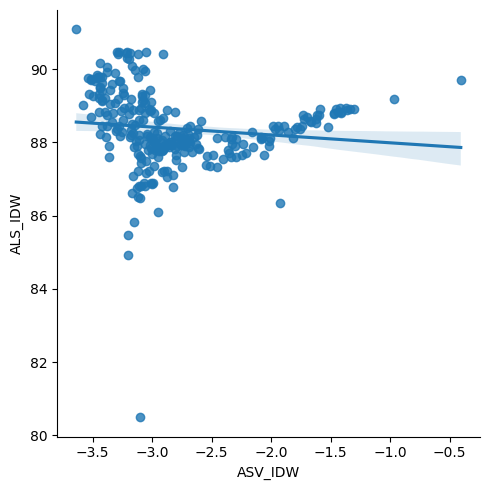

In [50]:
sns.lmplot(x="ASV_IDW", y="ALS_IDW", data=valle_corr_asv)

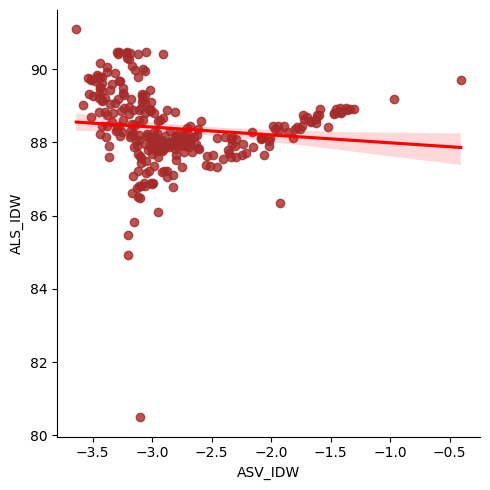

In [79]:
sns.lmplot(x="ASV_IDW", y="ALS_IDW",
            data=valle_corr_asv, line_kws={'color': 'red'}, scatter_kws={'color': 'brown'})

Mitä korkeampi Elevation/Height arvo sen matalampi ASV syvyys. Eli jos matala elevation, syvyys syvempi.

In [51]:
nuorgam_corr_asv = pd.read_csv('../data/output/nuorgam_asv_0.05_random_points.csv', delimiter=',')

In [52]:
nuorgam_corr_als = pd.read_csv('../data/output/nuorgam_als_random_points.csv', delimiter=',')

In [53]:
nuorgam_corr_asv["ALS_IDW"] = nuorgam_corr_als["SAMPLE_4"]

In [54]:
nuorgam_corr_asv

,id,SAMPLE_1,ALS_IDW
0,0,NaN,11.021682
1,1,NaN,11.900562
2,2,NaN,11.798510
3,3,NaN,11.087159
4,4,NaN,11.766635
...,...,...,...
295,295,NaN,11.425324
296,296,NaN,11.700172
297,297,NaN,11.857780
298,298,NaN,10.872744


In [55]:
nuorgam_corr_asv = nuorgam_corr_asv.rename(columns={"SAMPLE_1": "ASV_IDW"})

In [56]:
nuorgam_corr_asv["ASV_IDW"] = nuorgam_corr_asv["ASV_IDW"].fillna(0)

In [57]:
nuorgam_corr_asv

,id,ASV_IDW,ALS_IDW
0,0,0.0,11.021682
1,1,0.0,11.900562
2,2,0.0,11.798510
3,3,0.0,11.087159
4,4,0.0,11.766635
...,...,...,...
295,295,0.0,11.425324
296,296,0.0,11.700172
297,297,0.0,11.857780
298,298,0.0,10.872744


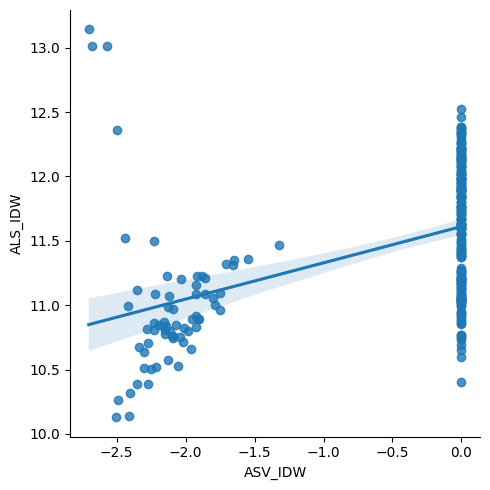

In [58]:
sns.lmplot(x="ASV_IDW", y="ALS_IDW", data=nuorgam_corr_asv)

In [59]:
nuorgam_corr_asv["ASV_IDW"].corr(nuorgam_corr_asv["ALS_IDW"])  

0.4474358028005311